# Mathematical Foundations: Ordinary Differential Equations in Systems Biology

**BIO559R - Introduction to Systems Biology**  
**Module 2: Mathematical Foundations**

## Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand ODE fundamentals** and their application to biological systems
2. **Model enzyme kinetics** using the Michaelis-Menten equation
3. **Analyze population dynamics** with the Lotka-Volterra predator-prey model
4. **Simulate gene regulatory networks** including toggle switches and oscillators
5. **Solve ODEs numerically** using Python's scipy.integrate
6. **Create publication-quality visualizations** using R ggplot2
7. **Interpret biological meaning** from mathematical solutions

## Prerequisites

- Basic calculus (derivatives)
- Python programming fundamentals
- R basics (optional, we'll use R magic)

---

## Setup and Imports

In [69]:
# Import Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import fsolve
import seaborn as sns

# Load R magic for visualization
%load_ext rpy2.ipython

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Libraries loaded successfully!
NumPy version: 2.2.6
Pandas version: 2.3.2


## Part 1: Introduction to ODEs in Biology

### What are Ordinary Differential Equations?

An **Ordinary Differential Equation (ODE)** describes how a variable changes over time. In biology, ODEs are fundamental for modeling dynamic processes:

$$\frac{dx}{dt} = f(x, t)$$

Where:
- $x$ is the state variable (e.g., concentration, population size)
- $t$ is time
- $f(x, t)$ is the rate of change function

### Types of ODEs in Biology

1. **First-order**: $\frac{dx}{dt} = -kx$ (exponential decay)
2. **Non-linear**: $\frac{dx}{dt} = rx(1 - \frac{x}{K})$ (logistic growth)
3. **Systems**: Multiple coupled equations
4. **Autonomous**: Rate doesn't explicitly depend on time

### Exercise 1.1: Simple Exponential Growth and Decay

In [70]:
# Define exponential growth/decay ODE: dx/dt = k*x
def exponential_model(x, t, k):
    """
    Exponential growth (k > 0) or decay (k < 0) model
    
    Parameters:
    x: current value
    t: time
    k: growth/decay rate constant
    """
    return k * x

# Parameters
k_growth = 0.1   # Growth rate
k_decay = -0.1   # Decay rate
x0 = 10          # Initial condition
t = np.linspace(0, 50, 100)  # Time points

# Solve ODEs
x_growth = odeint(exponential_model, x0, t, args=(k_growth,))
x_decay = odeint(exponential_model, x0, t, args=(k_decay,))

# Create DataFrame for R plotting
results_df = pd.DataFrame({
    'time': np.tile(t, 2),
    'value': np.concatenate([x_growth.flatten(), x_decay.flatten()]),
    'model': ['Growth'] * len(t) + ['Decay'] * len(t)
})

print("Exponential models solved successfully!")
print(f"Growth model final value: {x_growth[-1][0]:.2f}")
print(f"Decay model final value: {x_decay[-1][0]:.2f}")

Exponential models solved successfully!
Growth model final value: 1484.13
Decay model final value: 0.07


In [71]:
results_df

,time,value,model
0,0.000000,10.000000,Growth
1,0.505051,10.518022,Growth
2,1.010101,11.062878,Growth
3,1.515152,11.635959,Growth
4,2.020202,12.238727,Growth
...,...,...,...
195,47.979798,0.082464,Decay
196,48.484848,0.078402,Decay
197,48.989899,0.074541,Decay
198,49.494949,0.070870,Decay


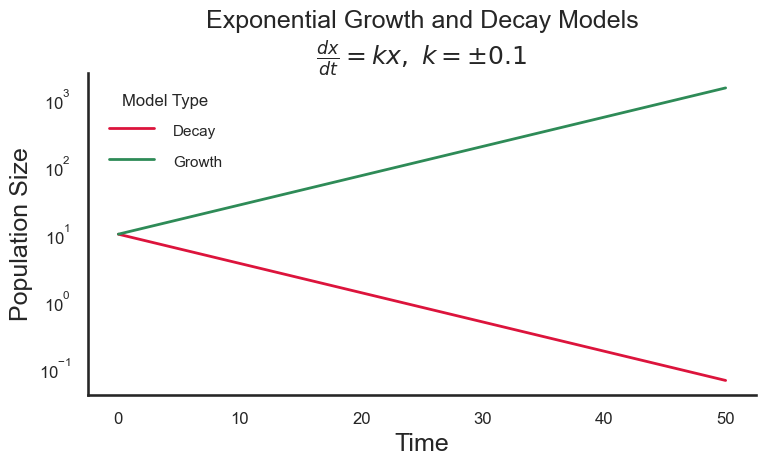

In [80]:
# Option A — if results_df is already a pandas DataFrame in Python
# (If it's only in R, see Option B below to pull it over.)

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Clean + sort
df = results_df.copy()
df = df.assign(
    time=pd.to_numeric(df["time"], errors="coerce"),
    value=pd.to_numeric(df["value"], errors="coerce"),
    model=df["model"].astype("category"),
).dropna(subset=["time", "value"])
df = df[df["value"] > 0]  # needed for log-scale
df = df.sort_values(["model", "time"])

# Aesthetics
sns.set_theme(context="talk", style="white")
palette = {"Growth": "#2E8B57", "Decay": "#DC143C"}

plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=df,
    x="time",
    y="value",
    hue="model",
    palette=palette,
    linewidth=2,
)

ax.set(
    xscale="linear",
    yscale="log",
    xlabel="Time",
    ylabel="Population Size",
)
ax.set_title("Exponential Growth and Decay Models\n$\\frac{dx}{dt} = kx,\\ k=\\pm 0.1$", fontsize=18)
ax.tick_params(labelsize=12)
leg = ax.legend(title="Model Type", frameon=False)
if leg is not None:
    plt.setp(leg.get_title(), fontsize=12)
    for t in leg.get_texts():
        t.set_fontsize(11)

sns.despine()
plt.tight_layout()
plt.show()


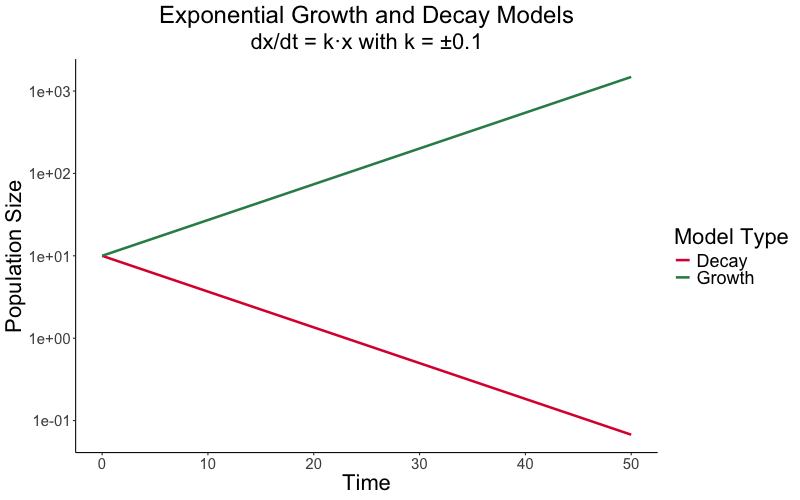

In [90]:
%%R -i results_df -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)

# Create publication-quality plot
p1 <- ggplot(results_df, aes(x = time, y = value, color = model)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c("Growth" = "#2E8B57", "Decay" = "#DC143C")) +
    labs(
        title = "Exponential Growth and Decay Models",
        subtitle = "dx/dt = k·x with k = ±0.1",
        x = "Time",
        y = "Population Size",
        color = "Model Type"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 24, hjust = 0.5),
        plot.subtitle = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 22),
        axis.text = element_text(size = 15),
        legend.title = element_text(size = 22),
        legend.text = element_text(size = 18)
    ) +
    scale_y_log10()

print(p1)

In [73]:
%%R
str(results_df); summary(results_df); table(results_df$model, useNA="ifany")


'data.frame':	200 obs. of  3 variables:
 $ time : num  0 0.505 1.01 1.515 2.02 ...
 $ value: num  10 10.5 11.1 11.6 12.2 ...
 $ model: chr  "Growth" "Growth" "Growth" "Growth" ...

 Decay Growth 
   100    100 


### 🧬 Biological Interpretation

**Exponential growth** models:
- Bacterial growth in unlimited resources
- Viral replication in early infection
- Protein synthesis from mRNA

**Exponential decay** models:
- Radioactive decay of isotopes
- Drug clearance from blood
- mRNA degradation

## Part 2: Enzyme Kinetics - Michaelis-Menten Model

### Theory

The Michaelis-Menten model describes enzyme-catalyzed reactions:

$$E + S \xrightleftharpoons[k_{-1}]{k_1} ES \xrightarrow{k_2} E + P$$

The rate equation is:

$$v = \frac{V_{max}[S]}{K_m + [S]}$$

Where:
- $V_{max} = k_2[E]_{total}$ (maximum velocity)
- $K_m = \frac{k_{-1} + k_2}{k_1}$ (Michaelis constant)
- $[S]$ is substrate concentration

### Exercise 2.1: Michaelis-Menten Kinetics

In [74]:
def michaelis_menten(S, Vmax, Km):
    """
    Michaelis-Menten rate equation
    
    Parameters:
    S: substrate concentration
    Vmax: maximum velocity
    Km: Michaelis constant
    """
    return (Vmax * S) / (Km + S)

# Parameters for different enzymes
enzymes = {
    'High_Affinity': {'Vmax': 100, 'Km': 1},    # Low Km = high affinity
    'Low_Affinity': {'Vmax': 100, 'Km': 10},   # High Km = low affinity
    'High_Activity': {'Vmax': 200, 'Km': 5}    # High Vmax = high activity
}

# Substrate concentration range
S_range = np.linspace(0, 50, 100)

# Calculate reaction rates
mm_results = []
for enzyme_name, params in enzymes.items():
    rates = michaelis_menten(S_range, params['Vmax'], params['Km'])
    for i, (s, rate) in enumerate(zip(S_range, rates)):
        mm_results.append({
            'substrate': s,
            'rate': rate,
            'enzyme': enzyme_name,
            'Vmax': params['Vmax'],
            'Km': params['Km']
        })

mm_df = pd.DataFrame(mm_results)
print("Michaelis-Menten analysis completed!")
print(f"Data shape: {mm_df.shape}")
print(mm_df.head())

Michaelis-Menten analysis completed!
Data shape: (300, 5)
   substrate       rate         enzyme  Vmax  Km
0   0.000000   0.000000  High_Affinity   100   1
1   0.505051  33.557047  High_Affinity   100   1
2   1.010101  50.251256  High_Affinity   100   1
3   1.515152  60.240964  High_Affinity   100   1
4   2.020202  66.889632  High_Affinity   100   1


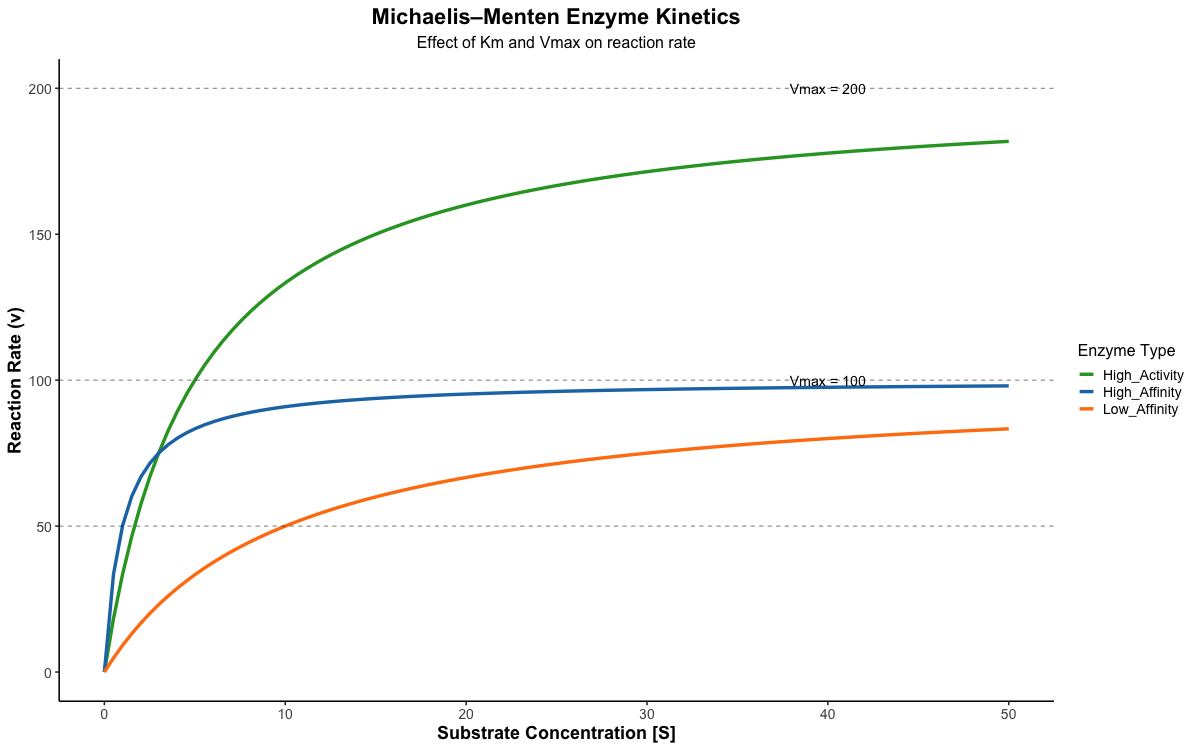

In [75]:
%%R -i mm_df -w 1200 -h 750 -u px
suppressPackageStartupMessages({library(ggplot2); library(dplyr)})

p2 <- ggplot(mm_df, aes(x = substrate, y = rate, color = enzyme)) +
  geom_line(linewidth = 1.6) +
  geom_hline(yintercept = c(50, 100, 200), linetype = "dashed", alpha = 0.5) +
  scale_color_manual(values = c(
    "High_Affinity" = "#1f77b4",
    "Low_Affinity"  = "#ff7f0e",
    "High_Activity" = "#2ca02c"
  )) +
  labs(
    title = "Michaelis–Menten Enzyme Kinetics",
    subtitle = "Effect of Km and Vmax on reaction rate",
    x = "Substrate Concentration [S]",
    y = "Reaction Rate (v)",
    color = "Enzyme Type"
  ) +
  theme_classic(base_size = 16) +  # global base font size
  theme(
    plot.title    = element_text(size = 22, hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(size = 16, hjust = 0.5),
    axis.title    = element_text(size = 18, face = "bold"),
    axis.text     = element_text(size = 14),
    legend.title  = element_text(size = 16),
    legend.text   = element_text(size = 14)
  ) +
  annotate("text", x = 40, y = 200, label = "Vmax = 200", size = 5) +
  annotate("text", x = 40, y = 100, label = "Vmax = 100", size = 5)

print(p2)


### Exercise 2.2: Full Enzyme Kinetics ODE System

In [76]:
def enzyme_kinetics_ode(y, t, k1, k_1, k2, Et):
    """
    Full enzyme kinetics ODE system
    
    Variables:
    y[0] = [S] (substrate)
    y[1] = [ES] (enzyme-substrate complex)
    y[2] = [P] (product)
    
    Parameters:
    k1, k_1, k2: rate constants
    Et: total enzyme concentration
    """
    S, ES, P = y
    E = Et - ES  # Free enzyme concentration
    
    # Rate equations
    dS_dt = -k1 * E * S + k_1 * ES
    dES_dt = k1 * E * S - k_1 * ES - k2 * ES
    dP_dt = k2 * ES
    
    return [dS_dt, dES_dt, dP_dt]

# Parameters
k1 = 1.0      # Forward binding rate
k_1 = 0.5     # Reverse binding rate
k2 = 2.0      # Catalytic rate
Et = 1.0      # Total enzyme concentration

# Initial conditions
S0 = 10.0     # Initial substrate
ES0 = 0.0     # Initial complex
P0 = 0.0      # Initial product
y0 = [S0, ES0, P0]

# Time points
t = np.linspace(0, 10, 1000)

# Solve ODE
solution = odeint(enzyme_kinetics_ode, y0, t, args=(k1, k_1, k2, Et))

# Create results DataFrame
enzyme_df = pd.DataFrame({
    'time': np.tile(t, 3),
    'concentration': np.concatenate([solution[:, 0], solution[:, 1], solution[:, 2]]),
    'species': ['Substrate'] * len(t) + ['ES Complex'] * len(t) + ['Product'] * len(t)
})

print("Enzyme kinetics ODE solved!")
print(f"Final concentrations:")
print(f"Substrate: {solution[-1, 0]:.3f}")
print(f"ES Complex: {solution[-1, 1]:.3f}")
print(f"Product: {solution[-1, 2]:.3f}")

Enzyme kinetics ODE solved!
Final concentrations:
Substrate: 0.186
ES Complex: 0.088
Product: 9.725


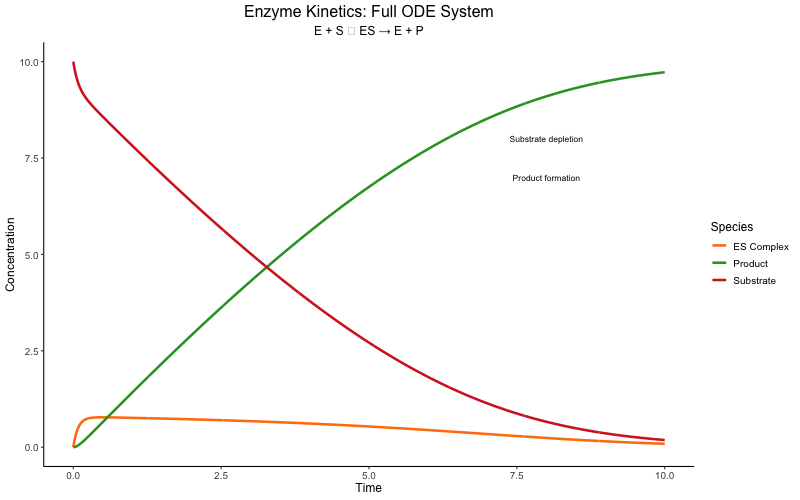

In [77]:
%%R -i enzyme_df  -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)

# Create enzyme kinetics time course plot
p3 <- ggplot(enzyme_df, aes(x = time, y = concentration, color = species)) +
    geom_line(size = 1.2) +
    scale_color_manual(values = c(
        "Substrate" = "#d62728",
        "ES Complex" = "#ff7f0e",
        "Product" = "#2ca02c"
    )) +
    labs(
        title = "Enzyme Kinetics: Full ODE System",
        subtitle = "E + S ⇌ ES → E + P",
        x = "Time",
        y = "Concentration",
        color = "Species"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10)
    ) +
    annotate("text", x = 8, y = 8, label = "Substrate depletion", size = 3) +
    annotate("text", x = 8, y = 7, label = "Product formation", size = 3)

print(p3)

### 🧬 Biological Applications

**Drug Metabolism**: Understanding how enzymes process drugs helps in:
- Dosing regimen design
- Drug-drug interaction prediction
- Personalized medicine

**Industrial Biocatalysis**: Optimizing enzyme-based processes for:
- Biofuel production
- Pharmaceutical synthesis
- Food processing

## Part 3: Population Dynamics - Lotka-Volterra Model

### Theory

The Lotka-Volterra model describes predator-prey dynamics:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = \delta xy - \gamma y$$

Where:
- $x$ = prey population
- $y$ = predator population
- $\alpha$ = prey growth rate
- $\beta$ = predation rate
- $\delta$ = predator efficiency
- $\gamma$ = predator death rate

### Exercise 3.1: Lotka-Volterra Dynamics

In [78]:
def lotka_volterra(y, t, alpha, beta, delta, gamma):
    """
    Lotka-Volterra predator-prey model
    
    Variables:
    y[0] = x (prey population)
    y[1] = y (predator population)
    
    Parameters:
    alpha: prey growth rate
    beta: predation rate
    delta: predator efficiency
    gamma: predator death rate
    """
    x, y_pred = y
    
    dx_dt = alpha * x - beta * x * y_pred
    dy_dt = delta * x * y_pred - gamma * y_pred
    
    return [dx_dt, dy_dt]

# Parameters
alpha = 1.0   # Prey growth rate
beta = 0.1    # Predation rate
delta = 0.075 # Predator efficiency
gamma = 1.5   # Predator death rate

# Initial conditions
x0 = 10  # Initial prey population
y0 = 5   # Initial predator population
y0_lv = [x0, y0]

# Time points
t = np.linspace(0, 15, 1000)

# Solve ODE
solution_lv = odeint(lotka_volterra, y0_lv, t, args=(alpha, beta, delta, gamma))

# Create results DataFrame
lv_df = pd.DataFrame({
    'time': np.tile(t, 2),
    'population': np.concatenate([solution_lv[:, 0], solution_lv[:, 1]]),
    'species': ['Prey'] * len(t) + ['Predator'] * len(t)
})

print("Lotka-Volterra model solved!")
print(f"Final populations:")
print(f"Prey: {solution_lv[-1, 0]:.2f}")
print(f"Predator: {solution_lv[-1, 1]:.2f}")

Lotka-Volterra model solved!
Final populations:
Prey: 9.78
Predator: 17.17


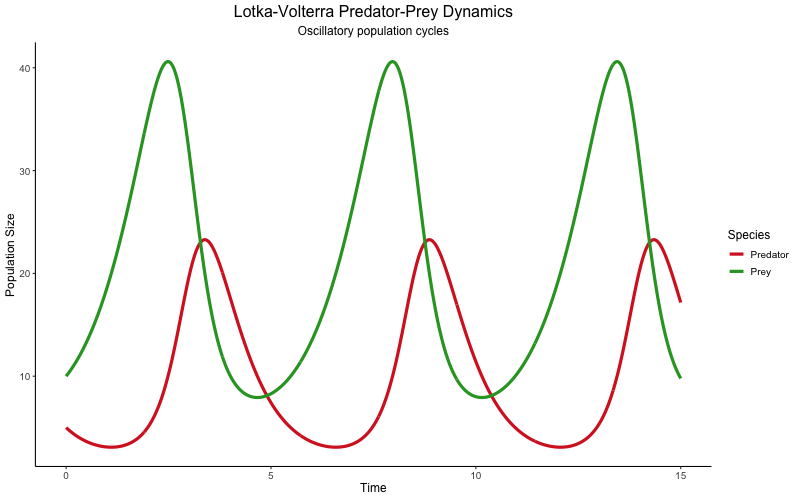

In [79]:
%%R -i lv_df -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)

# Create predator-prey dynamics plot
p4 <- ggplot(lv_df, aes(x = time, y = population, color = species)) +
    geom_line(size = 1.5) +
    scale_color_manual(values = c(
        "Prey" = "#2ca02c",
        "Predator" = "#d62728"
    )) +
    labs(
        title = "Lotka-Volterra Predator-Prey Dynamics",
        subtitle = "Oscillatory population cycles",
        x = "Time",
        y = "Population Size",
        color = "Species"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10)
    )

print(p4)

### Exercise 3.2: Phase Portrait Analysis

In [45]:
# Create phase portrait data
phase_df = pd.DataFrame({
    'prey': solution_lv[:, 0],
    'predator': solution_lv[:, 1],
    'time': t
})

# Calculate equilibrium point
x_eq = gamma / delta
y_eq = alpha / beta

print(f"Equilibrium point: ({x_eq:.2f}, {y_eq:.2f})")
print(f"Phase portrait data created with {len(phase_df)} points")

Equilibrium point: (20.00, 10.00)
Phase portrait data created with 1000 points


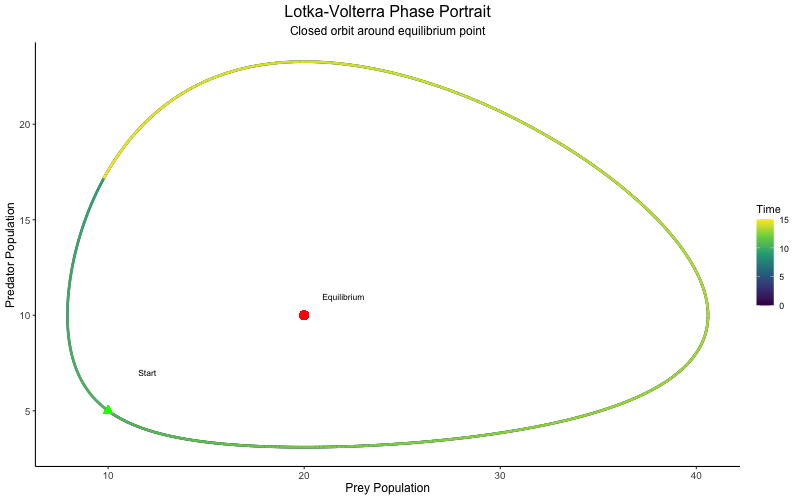

In [46]:
%%R -i phase_df -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)

# Calculate equilibrium point in R
x_eq <- 1.5 / 0.075  # gamma / delta
y_eq <- 1.0 / 0.1    # alpha / beta

# Create phase portrait
p5 <- ggplot(phase_df, aes(x = prey, y = predator)) +
    geom_path(aes(color = time), size = 1.2) +
    geom_point(x = x_eq, y = y_eq, color = "red", size = 4, shape = 16) +
    geom_point(aes(x = prey[1], y = predator[1]), color = "green", size = 3, shape = 17) +
    scale_color_viridis_c(name = "Time") +
    labs(
        title = "Lotka-Volterra Phase Portrait",
        subtitle = "Closed orbit around equilibrium point",
        x = "Prey Population",
        y = "Predator Population"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)
    ) +
    annotate("text", x = x_eq + 2, y = y_eq + 1, label = "Equilibrium", size = 3) +
    annotate("text", x = 12, y = 7, label = "Start", size = 3)

print(p5)

### 🧬 Biological Applications

**Wildlife Conservation**: Understanding predator-prey cycles helps in:
- Setting hunting quotas
- Predicting population crashes
- Ecosystem management

**Disease Dynamics**: Host-pathogen interactions follow similar patterns:
- Epidemic modeling
- Vaccination strategies
- Drug resistance evolution

## Part 4: Gene Regulatory Networks

### Theory

Gene regulatory networks can exhibit complex behaviors:

1. **Toggle Switch**: Two mutually repressing genes
2. **Repressilator**: Three-gene oscillator
3. **Positive Feedback**: Bistable switches

General form:
$$\frac{dx_i}{dt} = \alpha_i f_i(x_1, x_2, ..., x_n) - \beta_i x_i$$

### Exercise 4.1: Toggle Switch

In [47]:
def toggle_switch(y, t, alpha1, alpha2, beta1, beta2, n):
    """
    Toggle switch: two mutually repressing genes
    
    Variables:
    y[0] = u (gene 1 expression)
    y[1] = v (gene 2 expression)
    
    Parameters:
    alpha1, alpha2: maximum production rates
    beta1, beta2: degradation rates
    n: Hill coefficient (cooperativity)
    """
    u, v = y
    
    du_dt = alpha1 / (1 + v**n) - beta1 * u
    dv_dt = alpha2 / (1 + u**n) - beta2 * v
    
    return [du_dt, dv_dt]

# Parameters
alpha1 = alpha2 = 5.0  # Production rates
beta1 = beta2 = 1.0    # Degradation rates
n = 2                  # Hill coefficient

# Different initial conditions to show bistability
initial_conditions = [
    [0.1, 4.0],  # State 1: low u, high v
    [4.0, 0.1],  # State 2: high u, low v
    [2.5, 2.5]   # Unstable equilibrium
]

# Time points
t = np.linspace(0, 10, 1000)

# Solve for different initial conditions
toggle_results = []
for i, ic in enumerate(initial_conditions):
    solution = odeint(toggle_switch, ic, t, args=(alpha1, alpha2, beta1, beta2, n))
    
    for j, time_point in enumerate(t):
        toggle_results.append({
            'time': time_point,
            'gene1': solution[j, 0],
            'gene2': solution[j, 1],
            'initial_condition': f'IC_{i+1}'
        })

toggle_df = pd.DataFrame(toggle_results)
print("Toggle switch analysis completed!")
print(f"Data shape: {toggle_df.shape}")

Toggle switch analysis completed!
Data shape: (3000, 4)


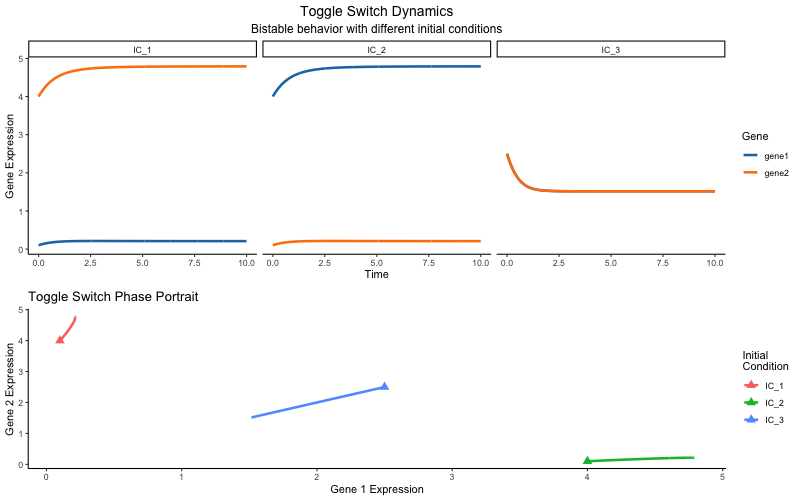

In [48]:
%%R -i toggle_df -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)
library(gridExtra)

# Reshape data for plotting
toggle_long <- toggle_df %>%
    tidyr::pivot_longer(cols = c(gene1, gene2), names_to = "gene", values_to = "expression")

# Time series plot
p6a <- ggplot(toggle_long, aes(x = time, y = expression, color = gene)) +
    geom_line(size = 1.2) +
    facet_wrap(~initial_condition, ncol = 3) +
    scale_color_manual(values = c("gene1" = "#1f77b4", "gene2" = "#ff7f0e")) +
    labs(
        title = "Toggle Switch Dynamics",
        subtitle = "Bistable behavior with different initial conditions",
        x = "Time",
        y = "Gene Expression",
        color = "Gene"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5)
    )

# Phase portrait
p6b <- ggplot(toggle_df, aes(x = gene1, y = gene2, color = initial_condition)) +
    geom_path(size = 1.2) +
    geom_point(data = toggle_df %>% filter(time == 0), size = 3, shape = 17) +
    labs(
        title = "Toggle Switch Phase Portrait",
        x = "Gene 1 Expression",
        y = "Gene 2 Expression",
        color = "Initial\nCondition"
    ) +
    theme_classic()

grid.arrange(p6a, p6b, nrow = 2, heights = c(2, 1.5))

### Exercise 4.2: Simple Gene Expression Model

In [49]:
def gene_expression(y, t, alpha, beta, gamma, delta):
    """
    Simple gene expression model: DNA -> mRNA -> Protein
    
    Variables:
    y[0] = m (mRNA concentration)
    y[1] = p (protein concentration)
    
    Parameters:
    alpha: transcription rate
    beta: mRNA degradation rate
    gamma: translation rate
    delta: protein degradation rate
    """
    m, p = y
    
    dm_dt = alpha - beta * m
    dp_dt = gamma * m - delta * p
    
    return [dm_dt, dp_dt]

# Parameters
alpha = 2.0   # Transcription rate
beta = 0.5    # mRNA degradation
gamma = 1.0   # Translation rate
delta = 0.2   # Protein degradation

# Initial conditions
m0 = 0.0  # Initial mRNA
p0 = 0.0  # Initial protein
y0_gene = [m0, p0]

# Time points
t = np.linspace(0, 20, 1000)

# Solve ODE
solution_gene = odeint(gene_expression, y0_gene, t, args=(alpha, beta, gamma, delta))

# Calculate steady-state values analytically
m_ss = alpha / beta
p_ss = (gamma * alpha) / (beta * delta)

# Create results DataFrame
gene_df = pd.DataFrame({
    'time': np.tile(t, 2),
    'concentration': np.concatenate([solution_gene[:, 0], solution_gene[:, 1]]),
    'species': ['mRNA'] * len(t) + ['Protein'] * len(t),
    'steady_state': [m_ss] * len(t) + [p_ss] * len(t)
})

print("Gene expression model solved!")
print(f"Steady-state mRNA: {m_ss:.2f}")
print(f"Steady-state Protein: {p_ss:.2f}")
print(f"Final mRNA: {solution_gene[-1, 0]:.2f}")
print(f"Final Protein: {solution_gene[-1, 1]:.2f}")

Gene expression model solved!
Steady-state mRNA: 4.00
Steady-state Protein: 20.00
Final mRNA: 4.00
Final Protein: 19.39


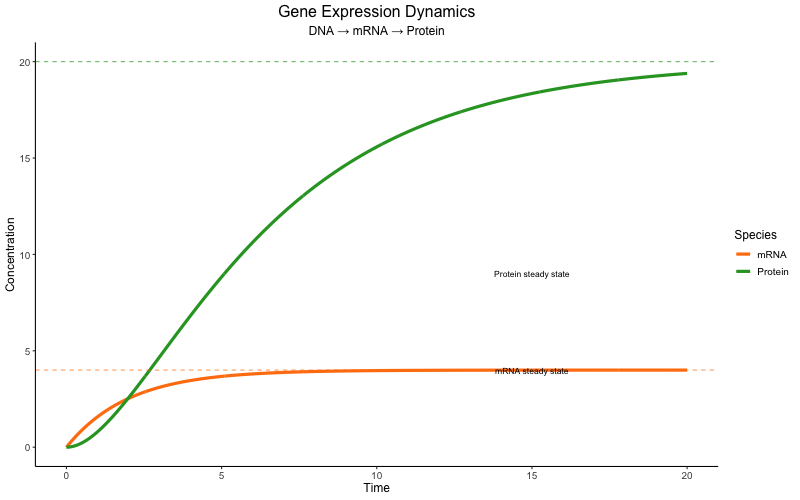

In [50]:
%%R -i gene_df -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)

# Create gene expression dynamics plot
p7 <- ggplot(gene_df, aes(x = time, y = concentration, color = species)) +
    geom_line(size = 1.5) +
    geom_hline(aes(yintercept = steady_state, color = species), 
               linetype = "dashed", alpha = 0.7) +
    scale_color_manual(values = c(
        "mRNA" = "#ff7f0e",
        "Protein" = "#2ca02c"
    )) +
    labs(
        title = "Gene Expression Dynamics",
        subtitle = "DNA → mRNA → Protein",
        x = "Time",
        y = "Concentration",
        color = "Species"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10)
    ) +
    annotate("text", x = 15, y = 4, label = "mRNA steady state", size = 3) +
    annotate("text", x = 15, y = 9, label = "Protein steady state", size = 3)

print(p7)

## Part 5: Interactive Problem-Solving

### Problem 5.1: Parameter Sensitivity Analysis

Investigate how changing parameters affects the Michaelis-Menten model.

In [51]:
# Parameter sensitivity analysis for Michaelis-Menten
def parameter_sensitivity_mm():
    """
    Analyze how Km and Vmax affect enzyme kinetics
    """
    S_range = np.linspace(0, 20, 100)
    
    # Different parameter sets
    param_sets = [
        {'Vmax': 100, 'Km': 1, 'label': 'High Affinity (Km=1)'},
        {'Vmax': 100, 'Km': 5, 'label': 'Medium Affinity (Km=5)'},
        {'Vmax': 100, 'Km': 10, 'label': 'Low Affinity (Km=10)'},
        {'Vmax': 50, 'Km': 5, 'label': 'Low Activity (Vmax=50)'},
        {'Vmax': 200, 'Km': 5, 'label': 'High Activity (Vmax=200)'}
    ]
    
    sensitivity_results = []
    for params in param_sets:
        rates = michaelis_menten(S_range, params['Vmax'], params['Km'])
        for s, rate in zip(S_range, rates):
            sensitivity_results.append({
                'substrate': s,
                'rate': rate,
                'condition': params['label'],
                'Vmax': params['Vmax'],
                'Km': params['Km']
            })
    
    return pd.DataFrame(sensitivity_results)

sensitivity_df = parameter_sensitivity_mm()
print("Parameter sensitivity analysis completed!")
print(f"Analyzed {len(sensitivity_df['condition'].unique())} different parameter sets")

Parameter sensitivity analysis completed!
Analyzed 5 different parameter sets


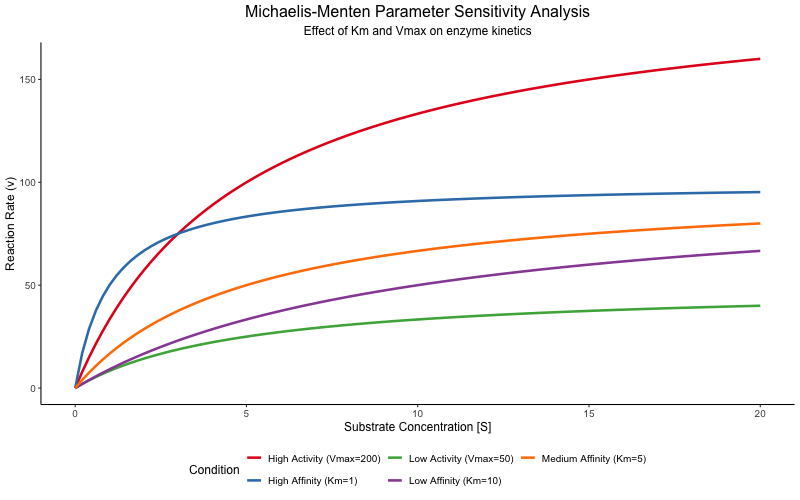

In [52]:
%%R -i sensitivity_df -w 800 -h 500 -u px

library(ggplot2)
library(dplyr)

# Create parameter sensitivity plot
p8 <- ggplot(sensitivity_df, aes(x = substrate, y = rate, color = condition)) +
    geom_line(size = 1.2) +
    scale_color_brewer(type = "qual", palette = "Set1") +
    labs(
        title = "Michaelis-Menten Parameter Sensitivity Analysis",
        subtitle = "Effect of Km and Vmax on enzyme kinetics",
        x = "Substrate Concentration [S]",
        y = "Reaction Rate (v)",
        color = "Condition"
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        legend.position = "bottom"
    ) +
    guides(color = guide_legend(nrow = 2))

print(p8)

### Problem 5.2: Your Turn - Competitive Inhibition

**Challenge**: Modify the Michaelis-Menten model to include competitive inhibition.

The modified equation is:
$$v = \frac{V_{max}[S]}{K_m(1 + \frac{[I]}{K_i}) + [S]}$$

Where $[I]$ is inhibitor concentration and $K_i$ is the inhibition constant.

In [53]:
def competitive_inhibition(S, Vmax, Km, I, Ki):
    """
    Michaelis-Menten with competitive inhibition
    
    Parameters:
    S: substrate concentration
    Vmax: maximum velocity
    Km: Michaelis constant
    I: inhibitor concentration
    Ki: inhibition constant
    """
    # TODO: Implement the competitive inhibition equation
    # Hint: The apparent Km increases with inhibitor concentration
    
    Km_apparent = Km * (1 + I / Ki)
    return (Vmax * S) / (Km_apparent + S)

# Test your implementation
S_test = np.linspace(0, 20, 100)
inhibitor_concentrations = [0, 1, 2, 5]  # Different inhibitor levels

inhibition_results = []
for I in inhibitor_concentrations:
    rates = competitive_inhibition(S_test, Vmax=100, Km=2, I=I, Ki=1)
    for s, rate in zip(S_test, rates):
        inhibition_results.append({
            'substrate': s,
            'rate': rate,
            'inhibitor': f'[I] = {I}'
        })

inhibition_df = pd.DataFrame(inhibition_results)
print("Competitive inhibition analysis completed!")
print("Try plotting the results to see the effect of inhibition!")

Competitive inhibition analysis completed!
Try plotting the results to see the effect of inhibition!


## Summary and Key Takeaways

### What We've Learned

1. **ODE Fundamentals**: How to model dynamic biological processes mathematically
2. **Enzyme Kinetics**: Michaelis-Menten model and its applications
3. **Population Dynamics**: Predator-prey interactions and oscillatory behavior
4. **Gene Networks**: Toggle switches, bistability, and regulatory circuits
5. **Numerical Methods**: Using Python's scipy.integrate for ODE solving
6. **Visualization**: Creating publication-quality plots with R ggplot2

### Biological Insights

- **Saturation kinetics** are ubiquitous in biology (enzymes, transporters, receptors)
- **Oscillatory dynamics** emerge from feedback loops in biological systems
- **Bistability** enables cellular decision-making and memory
- **Parameter sensitivity** determines system robustness and evolvability

### Next Steps

- Explore stochastic differential equations for noise in biological systems
- Learn about partial differential equations for spatial biology
- Study bifurcation theory for understanding system transitions
- Apply these concepts to real experimental data

---

**Congratulations!** You've completed the ODEs module of BIO559R Mathematical Foundations. 🎉